## Modélisation

L'objectif de ce Notebook est d'utiliser nos 'bag of words' de données obtenus précedemment pour implémenter un modèle un modèle de Machine Learning. Ce notebook contiendra deux parties de classification des questions en utilisant des méthodes supervisées et non supervisées.

In [231]:
# tables
import pandas as pd
import numpy as np
# graphics
import seaborn as sns
import matplotlib.pyplot as plt
# text processing
import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# expressions
import re
# machine learning
from sklearn.model_selection import train_test_split
# Deal with html text
from bs4 import BeautifulSoup
# Multiprocessing
import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm
# Import the wordcloud library
from wordcloud import WordCloud

# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
from sklearn.cluster import KMeans

UsageError: Line magic function `%%time` not found.


### Application d'une méthode non supervisée de modélisation des tags

### 2.1 Implémentation d'une LDA sur les titres des questions:

Pour notre approche non supervisée, nous utiliserons en premier lieu uniquement les tags. Ceux-ci contiennent en général les informations spécifiques au sujet de la question et sont, a priori, suffisants pour avoir une idée du contenu de celle-ci.

- On utilise une LDA (Latent Dirichlet Allocation) pour obtenir une liste des sujets ou topics principaux des questions dont nous disposons

Chargement du "bag of words" obtenu précedemment. 

In [47]:
df_bag = pd.read_hdf("output/classic_bag" + "4" + ".h5", index='False', key='stage', mode='r')
print("Le bag entier a un nombre total de {} mots".format(df_bag.shape[1]))

# Séparation des 'bags'
df_bag_train = df_bag.loc[df_bag["Train"] == 1]
df_bag_test = df_bag.loc[df_bag["Train"] == 0]

Le bag entier a un nombre total de 44413 mots


In [48]:
df_bag

00  000  0000  00000  000000  00000000  0000000000000000000000000  \
0      0    0     0      0       0         0                          0   
1      0    0     0      0       0         0                          0   
2      0    0     0      0       0         0                          0   
3      0    0     0      0       0         0                          0   
4      0    0     0      0       0         0                          0   
...   ..  ...   ...    ...     ...       ...                        ...   
2996   0    0     0      0       0         0                          0   
2997   0    0     0      0       0         0                          0   
2998   0    0     0      0       0         0                          0   
2999   0    0     0      0       0         0                          0   
3000   0    0     0      0       0         0                          0   

      000000000000000e  000000000000054390  \
0                    0                   0   
1                    0                   0   
2                    0                   0   
3                    0                   0   
4                    0                   0   
...                ...                 ...   
2996                 0                   0   
2997                 0                   0   
2998                 0                   0   
2999                 0                   0   
3000                 0                   0   

      000000000000484240fa063de5d0b744adbed63a81faea390000c8428640a43d5005bd44  \
0                                                     0                          
1                                                     0                          
2                                                     0                          
3                                                     0                          
4                                                     0                          
...                                                 ...                          
2996                                                  0                          
2997                                                  0                          
2998                                                  0                          
2999                                                  0                          
3000                                                  0                          

      ...  ﾀﾀ  ﾁﾒ  ﾔﾻ  ﾙﾺ  ﾝﾉ  ﾨﾈ  ﾱﾱ      Id  \
0     ...   0   0   0   0   0   0   0  174322   
1     ...   0   0   0   0   0   0   0  435582   
2     ...   0   0   0   0   0   0   0  179448   
3     ...   0   0   0   0   0   0   0  468742   
4     ...   0   0   0   0   0   0   0   93162   
...   ...  ..  ..  ..  ..  ..  ..  ..     ...   
2996  ...   0   0   0   0   0   0   0  111945   
2997  ...   0   0   0   0   0   0   0  461569   
2998  ...   0   0   0   0   0   0   0  494432   
2999  ...   0   0   0   0   0   0   0  339747   
3000  ...   0   0   0   0   0   0   0  316924   

                                                   Tags  Train  
0                                            [perforce]      1  
1              [c#, asp.net, sql-server, session-state]      1  
2                                          [linux, kde]      1  
3                          [.net, asp.net, asp.net-mvc]      1  
4                                                 [wcf]      1  
...                                                 ...    ...  
2996                                [python, http, put]      0  
2997                                   [.net, remoting]      0  
2998                                       [latex, tex]      0  
2999  [asp.net, web-services, multithreading, asynch...      0  
3000                             [asp.net-mvc, routing]      0  

[15002 rows x 44413 columns]

In [49]:
df_bag["Tags"]

0                                              [perforce]
1                [c#, asp.net, sql-server, session-state]
2                                            [linux, kde]
3                            [.net, asp.net, asp.net-mvc]
4                                                   [wcf]
                              ...                        
2996                                  [python, http, put]
2997                                     [.net, remoting]
2998                                         [latex, tex]
2999    [asp.net, web-services, multithreading, asynch...
3000                               [asp.net-mvc, routing]
Name: Tags, Length: 15002, dtype: object

In [50]:
df_bag["Train"]

0       1
1       1
2       1
3       1
4       1
       ..
2996    0
2997    0
2998    0
2999    0
3000    0
Name: Train, Length: 15002, dtype: int64

In [51]:
df_bag_train["Train"]

0        1
1        1
2        1
3        1
4        1
        ..
11996    1
11997    1
11998    1
11999    1
12000    1
Name: Train, Length: 12001, dtype: int64

In [52]:
df_bag_train["Tags"]

0                                      [perforce]
1        [c#, asp.net, sql-server, session-state]
2                                    [linux, kde]
3                    [.net, asp.net, asp.net-mvc]
4                                           [wcf]
                           ...                   
11996           [javascript, syntax-highlighting]
11997            [url, standards, file-extension]
11998                            [seo, googlebot]
11999                [.net, ado.net, rhino-mocks]
12000              [version-control, open-source]
Name: Tags, Length: 12001, dtype: object

Visualisation de tous nos tags

In [53]:
texts_tags = []
for i in range(len(df_bag_train)):
    # Récupération de la première ligne du 'bag of word'
    inputs = df_bag_train["Tags"][i]#.values#.loc[row,cols].values
    texts_tags.append(inputs)
print(texts_tags)

[['perforce'], ['c#', 'asp.net', 'sql-server', 'session-state'], ['linux', 'kde'], ['.net', 'asp.net', 'asp.net-mvc'], ['wcf'], ['ruby', 'perl', 'format'], ['iphone', 'iphone-web-app'], ['c++', 'winapi', 'png'], ['visual-c++', 'mfc', 'menu'], ['c#', 'logging', 'enterprise-library', 'application-blocks'], ['coding-style', 'maintenance'], ['beta'], ['php'], ['asp.net', 'visual-studio', 'visual-studio-2008'], ['mysql', 'server-hardware'], ['java', 'date', 'timestamp', 'gettime'], ['sql', 'oracle', 'optimization'], ['html', 'firefox', 'autocomplete', 'passwords'], ['vba', 'soap'], ['webserver', 'file-upload'], ['architecture', 'msmq', 'message-queue'], ['python', 'django', 'spell-checking'], ['unit-testing'], ['java'], ['c#-2.0'], ['mysql', 'grails'], ['c#', 'loops', 'lambda', 'capture'], ['regex', 'nested', 'finite-automata'], ['c', 'sockets', 'unix'], ['hardware', 'development-environment', 'cpu'], ['asp.net', 'jquery', 'ajax', 'asp.net-ajax', 'forms-authentication'], ['javascript', 'reg

Nous allons utilisé la fonction map() pour extraire tous nos tags de notre "bags of words"

In [54]:
all_tags = df_bag_train["Tags"].map(lambda field:field)

In [55]:
all_tags.values

array([list(['perforce']),
       list(['c#', 'asp.net', 'sql-server', 'session-state']),
       list(['linux', 'kde']), ..., list(['seo', 'googlebot']),
       list(['.net', 'ado.net', 'rhino-mocks']),
       list(['version-control', 'open-source'])], dtype=object)

In [56]:
np_text = df_bag_train["Tags"].values.copy()
full_text_tags_splitted = []
for i in range(len(np_text)):
    full_text_tags_splitted.extend(np_text[i])
full_text_tags_splitted[0:20]
del np_text

In [57]:
full_text_tags_splitted

['perforce',
 'c#',
 'asp.net',
 'sql-server',
 'session-state',
 'linux',
 'kde',
 '.net',
 'asp.net',
 'asp.net-mvc',
 'wcf',
 'ruby',
 'perl',
 'format',
 'iphone',
 'iphone-web-app',
 'c++',
 'winapi',
 'png',
 'visual-c++',
 'mfc',
 'menu',
 'c#',
 'logging',
 'enterprise-library',
 'application-blocks',
 'coding-style',
 'maintenance',
 'beta',
 'php',
 'asp.net',
 'visual-studio',
 'visual-studio-2008',
 'mysql',
 'server-hardware',
 'java',
 'date',
 'timestamp',
 'gettime',
 'sql',
 'oracle',
 'optimization',
 'html',
 'firefox',
 'autocomplete',
 'passwords',
 'vba',
 'soap',
 'webserver',
 'file-upload',
 'architecture',
 'msmq',
 'message-queue',
 'python',
 'django',
 'spell-checking',
 'unit-testing',
 'java',
 'c#-2.0',
 'mysql',
 'grails',
 'c#',
 'loops',
 'lambda',
 'capture',
 'regex',
 'nested',
 'finite-automata',
 'c',
 'sockets',
 'unix',
 'hardware',
 'development-environment',
 'cpu',
 'asp.net',
 'jquery',
 'ajax',
 'asp.net-ajax',
 'forms-authentication',
 'j

On affiche quelques 'tags' sous forme de Word Clouds afin d'évaluer les résultats:

In [58]:
vectorizer = CountVectorizer(dtype=np.uint8)
tags_CV=vectorizer.fit_transform(full_text_tags_splitted)
title_feature_names=vectorizer.get_feature_names()

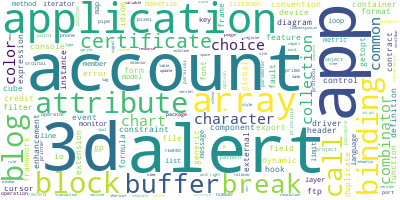

In [59]:
# Jumélasion de tous les tags.
long_string = ','.join(list(title_feature_names))
# Création de l'Objet WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Génération du word cloud
wordcloud.generate(long_string)
# Visualisation du  word cloud
wordcloud.to_image()

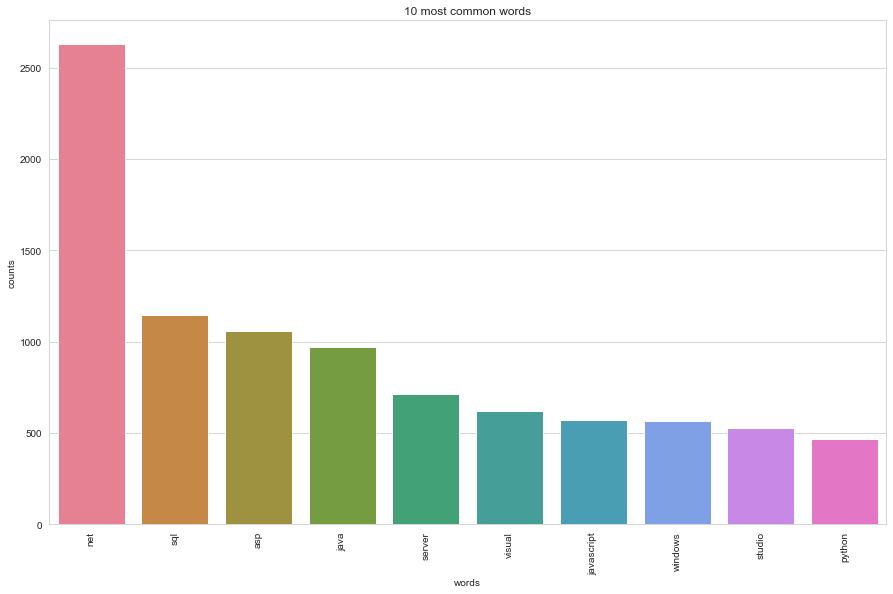

In [60]:
# Load the library with the CountVectorizer method
#from sklearn.feature_extraction.text import CountVectorizer
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style('whitegrid')
#%matplotlib inline
# Fonction Helper
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialisation du 'vectorizer' avec stop_words='english'
count_vectorizer = CountVectorizer(stop_words='english')
# Fit/transform des tags 
count_data = count_vectorizer.fit_transform(full_text_tags_splitted)
# Visualisation des 10 mots les plus communs
plot_10_most_common_words(count_data, count_vectorizer)

In [61]:
#import warnings
#warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
#from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Fonction Helper
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Ajustement des deux paramètres ci-dessous
# On ajuste deux suelement pour des raison de 
# simplicité
number_topics = 5
number_words = 10
# Création et fit du modèle LDA
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print des 'topics' obtenus via LDA
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
javascript windows python ruby html web services cocoa rails ajax

Topic #1:
php jquery user interface apache controls silverlight flex nhibernate events

Topic #2:
java testing data performance control unit oracle version string perl

Topic #3:
visual studio database 2008 xml linux eclipse iphone security file

Topic #4:
net sql asp server mysql linq css mvc winforms vb


Maintenant que nous avons un modèle entraîné, visualisons les resultats. Pour ce faire, nous utiliserons un outil de visualisation populaire, pyLDAvis, conçu pour vous aider de manière interactive afin de :

- Mieux comprendre et interpréter les 'Tags' individuellement, et
- Mieux comprendre les relations entre les 'Tags'.

Pour Mieux comprendre et interpréter chaque 'Tags' ,on peut sélectionner manuellement chaque sujet pour afficher a fréquence et/ou sa «pertinents», en utilisant différentes valeurs du paramètre λ. Cela peut nous aider lorsque nous essayons d'attribuer un nom ou une «signification» interprétable par un humain à chaque 'Tags'.

Pour les relations entre 'Tags', l'exploration du diagramme de distance intertopic peut nous aider à découvrir comment les 'Tags' sont liés les uns aux autres, y compris la structure potentielle de niveau supérieur entre les groupes de 'Tags'.

In [62]:
#%%time
#from pyLDAvis import sklearn as sklearn_lda
#import pickle 
#import pyLDAvis
#import os

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

CPU times: user 34.3 ms, sys: 14.8 ms, total: 49 ms
Wall time: 73.8 ms


In [63]:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

In [19]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.195336  0.327201       1        1  23.111603
0     -0.253999  0.013952       2        1  20.372251
2      0.181912 -0.220104       3        1  20.340994
4     -0.238884  0.017865       4        1  19.462280
3      0.115635 -0.138914       5        1  16.712872, topic_info=          Term         Freq        Total Category  logprob  loglift
2207       net  2421.000000  2421.000000  Default  30.0000  30.0000
199        asp   983.000000   983.000000  Default  29.0000  29.0000
3224       sql  1001.000000  1001.000000  Default  28.0000  28.0000
1720      java   857.000000   857.000000  Default  27.0000  27.0000
3057    server   621.000000   621.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1323  function    43.775095    44.495729   Topic5  -5.0702   1.7727
321        bit    41.794530    42.5

In [20]:
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

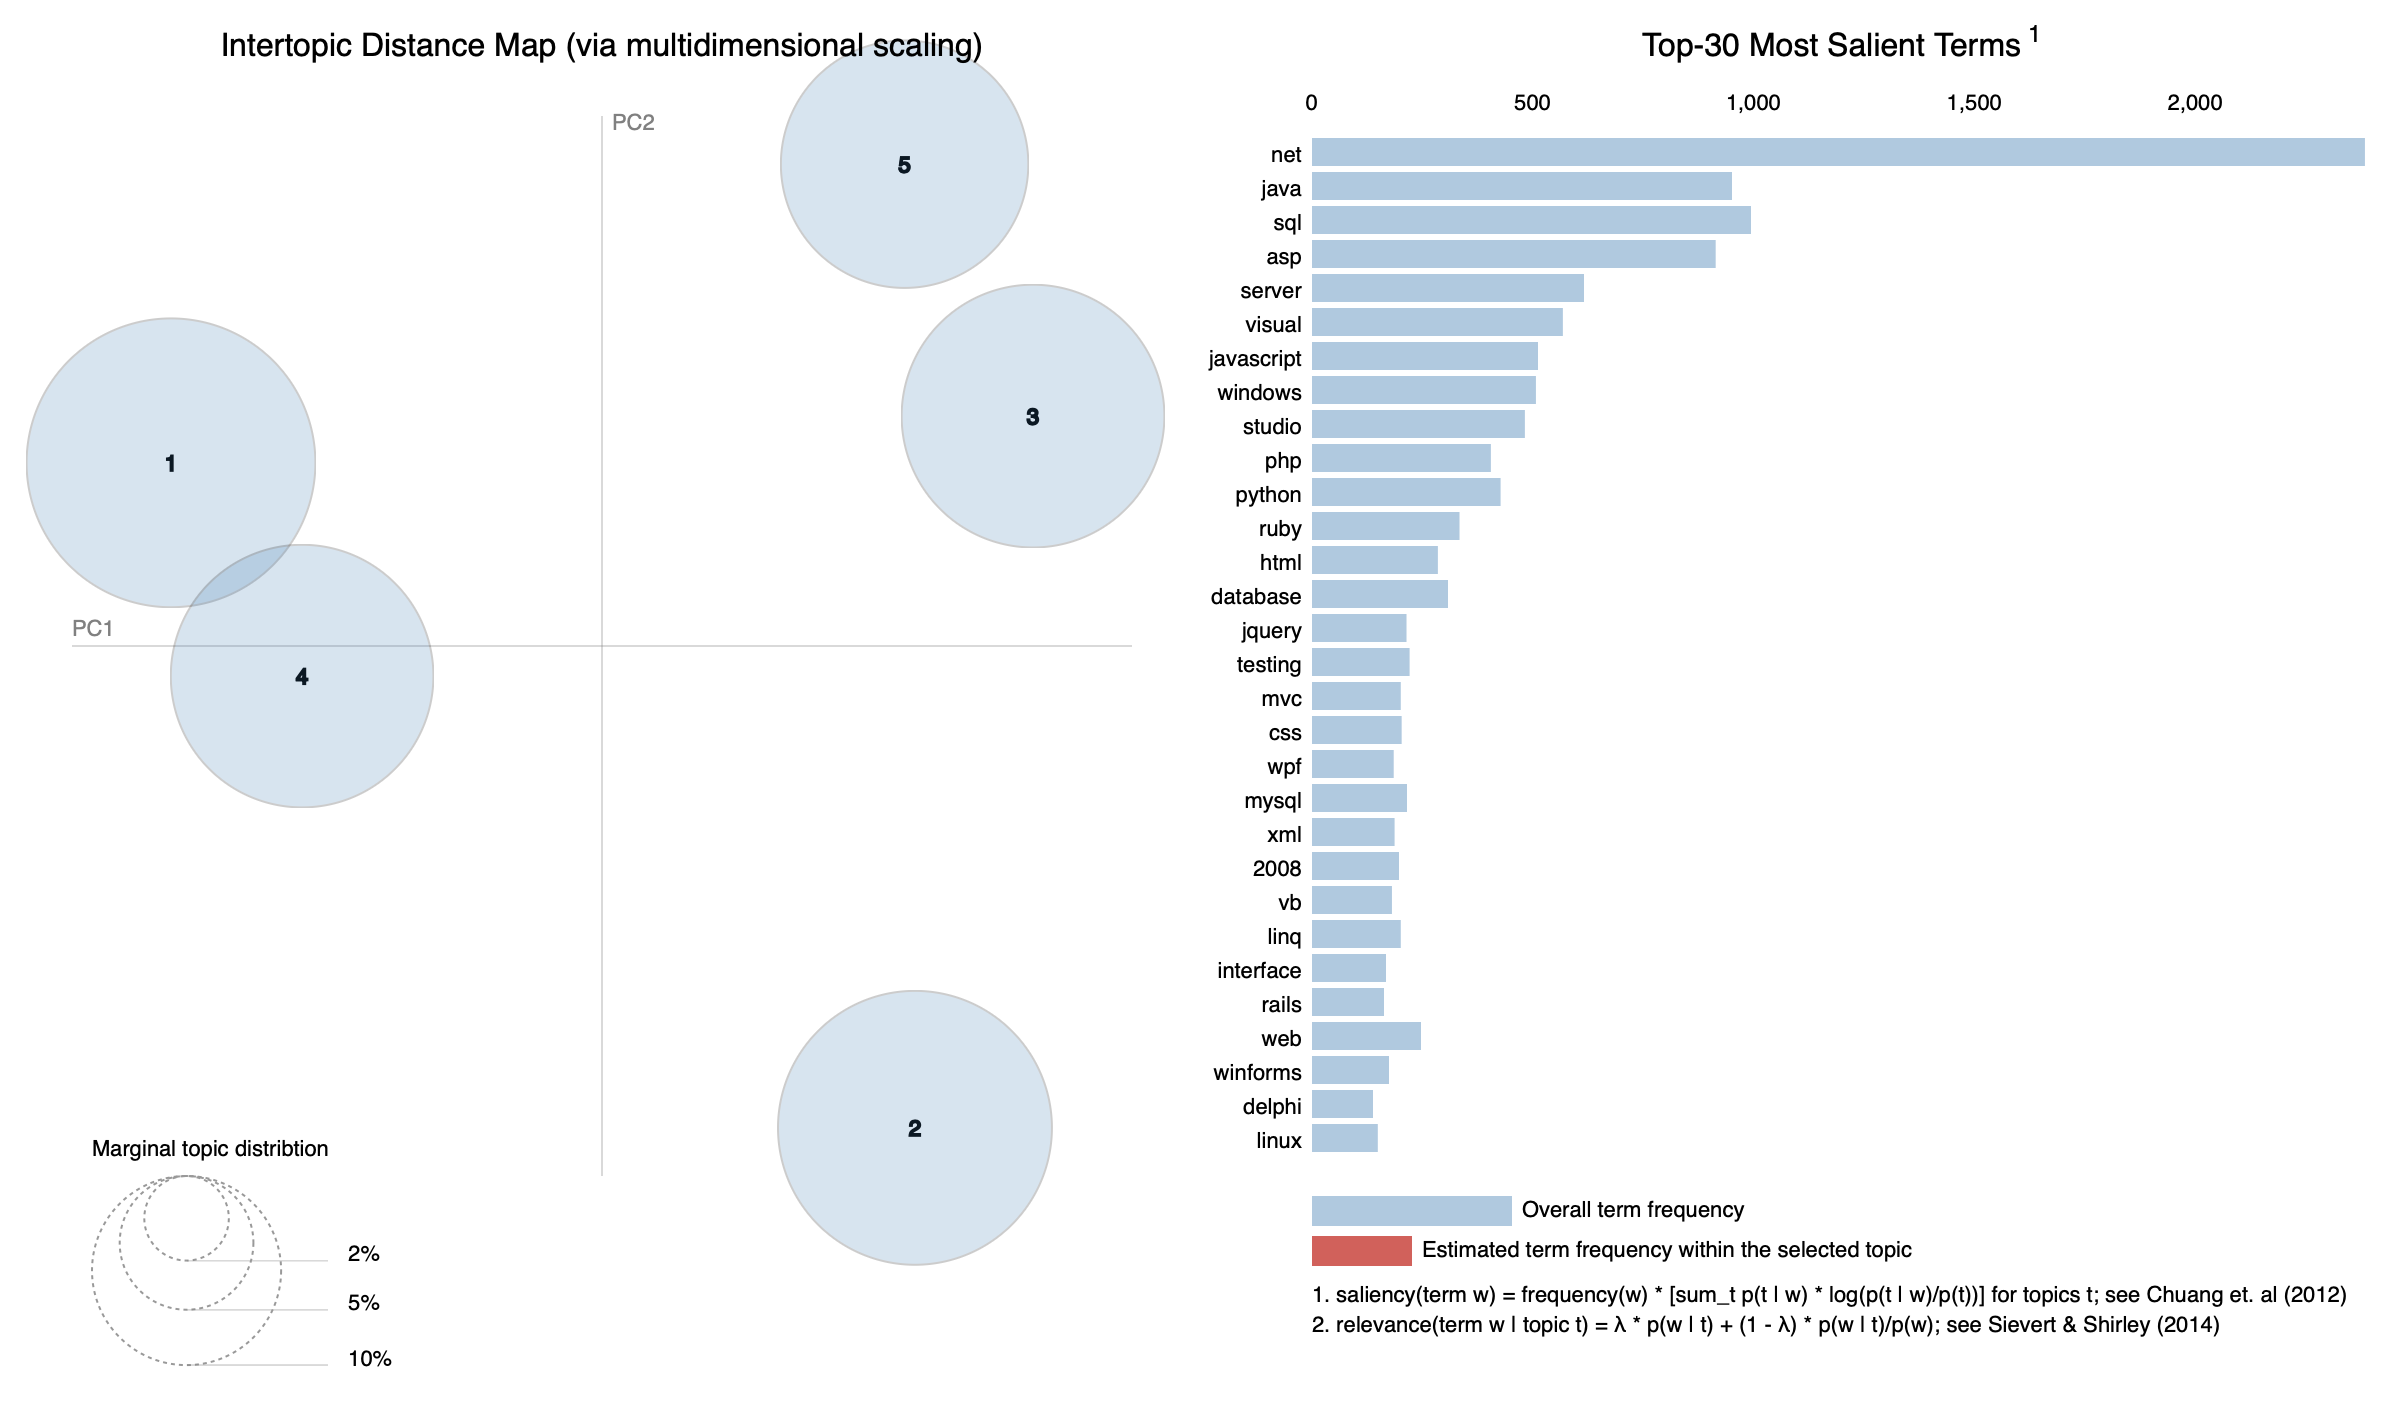

In [35]:
from IPython.display import Image
Image("./picture.png")

## Application d'une méthode supervisée de classification multi-label pour prédire les tags

Nous allons maintenant entraîner plusieurs modèles de classification supervisée sur les données dans le but de prédire les tags associés à une question. Notre approche consistera d'abord à tester plusieurs modèles et de comparer leurs perfomances respectives. L'évaluation des performances sera réalisée par le biais de plusieurs métriques prenant en compte la nature des labels('tags' multiples) afin de sélectionner le modèle le plus probant vis-à-vis de la problématique. Le but est de sélectionner 3 modèles qui seront entraînés respectivement sur les 'tags', 'Tilte' et 'Body'. Le modèle final consistera en un voting des trois modèles. Afin d'avoir plus de données d'entraînement, cette partie utilisera un data contenant 100 000 questions.

In [64]:
df_bag_train

00  000  0000  00000  000000  00000000  0000000000000000000000000  \
0       0    0     0      0       0         0                          0   
1       0    0     0      0       0         0                          0   
2       0    0     0      0       0         0                          0   
3       0    0     0      0       0         0                          0   
4       0    0     0      0       0         0                          0   
...    ..  ...   ...    ...     ...       ...                        ...   
11996   0    0     0      0       0         0                          0   
11997   0    0     0      0       0         0                          0   
11998   0    0     0      0       0         0                          0   
11999   0    0     0      0       0         0                          0   
12000   0    0     0      0       0         0                          0   

       000000000000000e  000000000000054390  \
0                     0                   0   
1                     0                   0   
2                     0                   0   
3                     0                   0   
4                     0                   0   
...                 ...                 ...   
11996                 0                   0   
11997                 0                   0   
11998                 0                   0   
11999                 0                   0   
12000                 0                   0   

       000000000000484240fa063de5d0b744adbed63a81faea390000c8428640a43d5005bd44  \
0                                                      0                          
1                                                      0                          
2                                                      0                          
3                                                      0                          
4                                                      0                          
...                                                  ...                          
11996                                                  0                          
11997                                                  0                          
11998                                                  0                          
11999                                                  0                          
12000                                                  0                          

       ...  ﾀﾀ  ﾁﾒ  ﾔﾻ  ﾙﾺ  ﾝﾉ  ﾨﾈ  ﾱﾱ      Id  \
0      ...   0   0   0   0   0   0   0  174322   
1      ...   0   0   0   0   0   0   0  435582   
2      ...   0   0   0   0   0   0   0  179448   
3      ...   0   0   0   0   0   0   0  468742   
4      ...   0   0   0   0   0   0   0   93162   
...    ...  ..  ..  ..  ..  ..  ..  ..     ...   
11996  ...   0   0   0   0   0   0   0  113440   
11997  ...   0   0   0   0   0   0   0  322944   
11998  ...   0   0   0   0   0   0   0  262135   
11999  ...   0   0   0   0   0   0   0  155797   
12000  ...   0   0   0   0   0   0   0  348609   

                                           Tags  Train  
0                                    [perforce]      1  
1      [c#, asp.net, sql-server, session-state]      1  
2                                  [linux, kde]      1  
3                  [.net, asp.net, asp.net-mvc]      1  
4                                         [wcf]      1  
...                                         ...    ...  
11996         [javascript, syntax-highlighting]      1  
11997          [url, standards, file-extension]      1  
11998                          [seo, googlebot]      1  
11999              [.net, ado.net, rhino-mocks]      1  
12000            [version-control, open-source]      1  

[12001 rows x 44413 columns]

In [65]:
df_bag_train.loc[0:5, "Tags"]

0                                  [perforce]
1    [c#, asp.net, sql-server, session-state]
2                                [linux, kde]
3                [.net, asp.net, asp.net-mvc]
4                                       [wcf]
5                        [ruby, perl, format]
Name: Tags, dtype: object

In [66]:
df_bag_train.shape

(12001, 44413)

(4022, 2)

------------------Top 20 tags:--------------------------


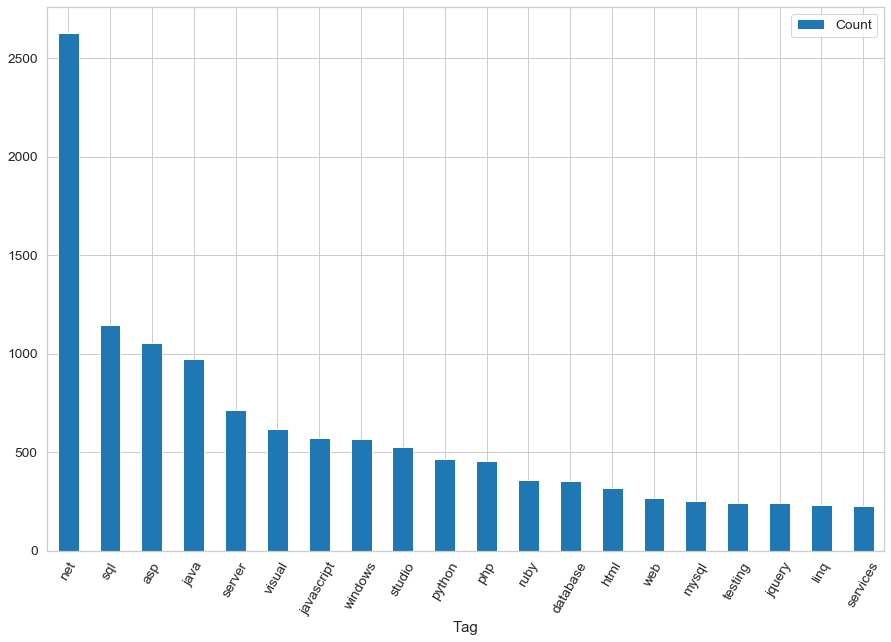

In [24]:
tag_vectorizer = CountVectorizer(dtype=np.uint8)
tag_CV=tag_vectorizer.fit_transform(full_text_tags_splitted)
tag_names=tag_vectorizer.get_feature_names()
# Somme de chaque mots du vocabulaire 
tag_CV=tag_CV.toarray()
dist = np.sum(tag_CV, axis=0)
sorted_counts=dist.argsort()
tags={}
for i in sorted_counts:
    tags[tag_names[i]]=dist[i]
tags_df=pd.DataFrame(columns=['Tag', 'Count'])
tags_df['Tag']=list(tags.keys())
tags_df['Count']=list(tags.values())
tags_df.sort_values(by=['Count'],ascending=False,inplace=True)
print(tags_df.shape)

tags_df[0:20].plot.bar(x='Tag',y='Count',rot=60,figsize=(15,10))
print("\n------------------Top 20 tags:--------------------------")

In [67]:
# Créer une liste des index de balises par ordre décroissant de fréquence pour les chaînes de classifieur
tag_order_dict={}
for index,tag in enumerate(list(df_bag_train.columns)):
    tag_order_dict[tag]=index
tags_ordered_indexes=[]
for tag in df_bag_train['Tags']:
    try:
        tags_ordered_indexes.append(tag_order_dict[tag])
    except:
        pass

In [68]:
df_train = df_bag_train.drop(columns=["Id", "Tags", 'Train']) 
df_test = df_bag_test.drop(columns=["Id", "Tags", 'Train'])

In [69]:
Y_train = df_bag_train["Tags"]

In [70]:
df =  df_train.apply(lambda x: np.str_(x))

In [71]:
df

00        0        0\n1        0\n2        0\n3        0...
000       0        0\n1        0\n2        0\n3        0...
0000      0        0\n1        0\n2        0\n3        0...
00000     0        0\n1        0\n2        0\n3        0...
000000    0        0\n1        0\n2        0\n3        0...
                                ...                        
ﾔﾻ        0        0\n1        0\n2        0\n3        0...
ﾙﾺ        0        0\n1        0\n2        0\n3        0...
ﾝﾉ        0        0\n1        0\n2        0\n3        0...
ﾨﾈ        0        0\n1        0\n2        0\n3        0...
ﾱﾱ        0        0\n1        0\n2        0\n3        0...
Length: 44410, dtype: object

In [72]:
y= Y_train.apply(lambda x: np.str_(x))

In [73]:
y

0                                            ['perforce']
1        ['c#', 'asp.net', 'sql-server', 'session-state']
2                                        ['linux', 'kde']
3                      ['.net', 'asp.net', 'asp.net-mvc']
4                                                 ['wcf']
                               ...                       
11996               ['javascript', 'syntax-highlighting']
11997              ['url', 'standards', 'file-extension']
11998                                ['seo', 'googlebot']
11999                  ['.net', 'ado.net', 'rhino-mocks']
12000                  ['version-control', 'open-source']
Name: Tags, Length: 12001, dtype: object

In [32]:
y.shape

(12001,)

In [33]:
df.shape

(44410,)

In [34]:
df = df[:12001]
df.shape

(12001,)

In [35]:
X_train, X_test, y_train, y_test= train_test_split(df, y, test_size=0.2)

In [36]:
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [59]:
title_vectorizer= CountVectorizer(dtype=np.uint8)

x_train=title_vectorizer.fit_transform(X_train)#(X_train.apply(lambda x: np.str_(x)))
x_test=title_vectorizer.transform(X_test)#(X_test.apply(lambda x: np.str_(x)))

# initialize classifier chains multi-label classifier
cmb_title = ClassifierChain(ComplementNB(), order=tags_ordered_indexes)
mnb_title = ClassifierChain(MultinomialNB(), order=tags_ordered_indexes)
 
# Training model on train data
cmb_title.fit(x_train, y_train)
mnb_title.fit(x_train, y_train)

predictions_cmb_title= cmb_title.predict(x_test)
predictions_mnb_title= mnb_title.predict(x_test)  

precision_scores_titles=pd.DataFrame(columns=['Model'])
precision_scores_titles['Model']=['MultinomialNB Titles','ComplementNB Titles']

for col, metric in zip(['Accuracy','Hamming Loss','Wrong Labels','Missed Labels'], [accuracy_score, hamming_loss, wrong_label_counter, missed_label_counter]):
  precision_scores_titles[col]=[metric(y_test, predictions_mnb_title), metric(y_test, predictions_cmb_title) ]
  
precision_scores_titles.style

IndexError: tuple index out of range

## Random Forest

In [37]:
title_vectorizer= CountVectorizer(dtype=np.uint8)

x_train=title_vectorizer.fit_transform(X_train)#(X_train.apply(lambda x: np.str_(x)))
x_test=title_vectorizer.transform(X_test)#(X_test.apply(lambda x: np.str_(x)))

In [38]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print(vocab)

['00904', '00907', '00932', '00933', '00942', '01461', '03', '1045', '1067', '11', '1241', '1242', '12519', '16', '17', '2000', '2003', '2005', '2006', '2007', '2008', '2009', '2010', '2012', '2d', '2to3', '301', '32', '3d', '3ds', '400', '404', '405', '503', '64', '754', '7zip', '8859', '97', '98', 'aaa', 'aac', 'aasm', 'ab', 'abap', 'absolute', 'abstract', 'abstraction', 'accelerator', 'acceptance', 'access', 'accessibility', 'accessor', 'accordion', 'accordionpane', 'account', 'accounts', 'accuracy', 'accurev', 'acl', 'acpi', 'acrobat', 'action', 'actionmailer', 'actionresult', 'actionscript', 'activator', 'active', 'activemq', 'activerecord', 'activereports', 'activestate', 'activex', 'activity', 'ada', 'adaption', 'adaptive', 'add', 'addeventlistener', 'addins', 'addition', 'addon', 'addremoveprograms', 'address', 'addressing', 'adf', 'adhoc', 'adjacency', 'admin', 'administration', 'administrator', 'ado', 'adobe', 'adodb', 'adomd', 'adp', 'adsense', 'adsi', 'adventureworks', 'adw

In [39]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit(x_train, y_train)

Training the random forest...


In [44]:
result = forest.predict(x_test)

In [60]:
result

array(["['asp.net']", "['asp.net']", "['asp.net']", ..., "['asp.net']",
       "['asp.net']", "['asp.net']"], dtype=object)

In [57]:
forest.feature_importances_

array([1.11621897e-04, 1.15707597e-04, 8.86566636e-05, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [45]:
precision_scores_titles=pd.DataFrame(columns=['Random Forest'])

In [100]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), result), 
             reverse=True))

Features sorted by their score:
[(0.0001, "['linux', 'crash', 'coredump']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']"), (0.0001, "['asp.net']")

## Autres methodes 

In [238]:
df_main = pd.DataFrame(columns=["Id", "Title", "Body", "Tags"])

In [239]:
df_main = df_main.append(pd.read_csv("input/QueryResults.csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(1).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(2).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(3).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(4).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(5).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(6).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(7).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(8).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(9).csv"), ignore_index = True)

In [240]:
df_main.shape

(73942, 4)

In [241]:
df_main = df_main[:1200]#[:12001]

In [147]:
xtrain, xtest = train_test_split(df_main, random_state=0)

In [148]:
xtrain = df_main

In [149]:
df_main.shape

(12001, 4)

In [242]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

In [243]:
# Get the number of reviews based on the dataframe column size
num_reviews = df_main["Title"].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words( df_main["Title"][i] ) )

In [244]:
print("Cleaning and parsing the training set movie reviews...\n")
clean_train_reviews = []
for i in range( 0, num_reviews ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print("Review %d of %d\n" % ( i+1, num_reviews ))                                                                   
    clean_train_reviews.append( review_to_words( df_main["Title"][i] ))

Cleaning and parsing the training set movie reviews...

Review 1000 of 1200



In [245]:
clean_train_reviews[1]

'percentage width child element absolutely positioned parent internet explorer'

In [246]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1200) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [247]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print(vocab)

['abap', 'absolute', 'abstract', 'access', 'accessing', 'accurate', 'across', 'action', 'actionscript', 'active', 'add', 'adding', 'address', 'ado', 'adobe', 'advantages', 'advice', 'age', 'agile', 'air', 'ajax', 'algorithm', 'allow', 'alpha', 'alternative', 'always', 'analysis', 'animation', 'another', 'anyone', 'apache', 'api', 'app', 'applescript', 'application', 'applications', 'appropriate', 'apps', 'arithmetic', 'around', 'array', 'asp', 'assembly', 'asynchronous', 'attribute', 'attributes', 'audio', 'audit', 'authenticated', 'authentication', 'auto', 'autoboxing', 'automatically', 'available', 'back', 'background', 'backups', 'backward', 'bad', 'bar', 'base', 'based', 'bdd', 'behavior', 'behind', 'best', 'better', 'big', 'bin', 'binary', 'binding', 'bit', 'blending', 'block', 'blocking', 'book', 'box', 'branch', 'break', 'browse', 'browser', 'browsers', 'bug', 'build', 'building', 'built', 'business', 'button', 'buttons', 'byte', 'bytes', 'cache', 'caching', 'calculate', 'call',

In [248]:
test = pd.read_csv("input/test.csv")
#test = test[:1200]

In [250]:
# Read the test data
test = pd.read_csv("input/test.csv")#, header=0, delimiter="\t", \
                  # quoting=3 )

# Verify that there are 25,000 rows and 2 columns
print(test.shape)

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["Title"])
clean_test_reviews = [] 

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test["Title"][i] )
    clean_test_reviews.append( clean_review )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

(5455, 4)
Cleaning and parsing the test set movie reviews...

Review 1000 of 5455

Review 2000 of 5455

Review 3000 of 5455

Review 4000 of 5455

Review 5000 of 5455



In [251]:
len(df_main["Tags"])

1200

In [252]:
len(test["Tags"])

5455

In [253]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

In [263]:
print("Training the random forest...")
# Initialize a Random Forest classifier with 100 trees
for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    forest = OneVsRestClassifier(classifier)
    
    # Fit the forest to the training set, using the bag of words as 
    # features and the sentiment labels as the response variable
    #
    # This may take a few minutes to run
    forest = forest.fit( train_data_features, df_main["Tags"] )
    y_pred = forest.predict(test_data_features)
    
    
    ytest = np.array(test["Tags"])
    print("Features sorted by their score:")
    print(classification_report(ytest, y_pred ))
    print(classifier)
    print(confusion_matrix(ytest, y_pred))
    #print(classifier)

Training the random forest...


/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Features sorted by their score:


/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                      precision    recall  f1-score   support

                                        <.htaccess><deployment><scp><shared-hosting>       0.00      0.00      0.00         1
                                                            <.htaccess><mod-rewrite>       0.00      0.00      0.00         1
                                              <.net-2.0><installation><dependencies>       0.00      0.00      0.00         1
                                                                   <.net-2.0><yield>       0.00      0.00      0.00         1
                                                                          <.net-3.5>       0.00      0.00      0.00         1
                                                            <.net-3.5><intellisense>       0.00      0.00      0.00         1
                  <.net-3.5><reportviewer><web-deployment-project><reportviewer2008>       0.00      0.00      0.00  

Features sorted by their score:


/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                      precision    recall  f1-score   support

                                        <.htaccess><deployment><scp><shared-hosting>       0.00      0.00      0.00         1
                                                            <.htaccess><mod-rewrite>       0.20      1.00      0.33         1
                                              <.net-2.0><installation><dependencies>       0.00      0.00      0.00         1
                                                                   <.net-2.0><yield>       0.00      0.00      0.00         1
                                                                          <.net-3.5>       0.20      1.00      0.33         1
                                                            <.net-3.5><intellisense>       0.00      0.00      0.00         1
                  <.net-3.5><reportviewer><web-deployment-project><reportviewer2008>       0.00      0.00      0.00  

Features sorted by their score:


/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                      precision    recall  f1-score   support

                                        <.htaccess><deployment><scp><shared-hosting>       0.00      0.00      0.00         1
                                                            <.htaccess><mod-rewrite>       0.00      0.00      0.00         1
                                              <.net-2.0><installation><dependencies>       0.00      0.00      0.00         1
                                                                   <.net-2.0><yield>       0.00      0.00      0.00         1
                                                                          <.net-3.5>       0.00      0.00      0.00         1
                                                            <.net-3.5><intellisense>       0.00      0.00      0.00         1
                  <.net-3.5><reportviewer><web-deployment-project><reportviewer2008>       0.00      0.00      0.00  

Features sorted by their score:


/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                      precision    recall  f1-score   support

                                        <.htaccess><deployment><scp><shared-hosting>       0.00      0.00      0.00         1
                                                            <.htaccess><mod-rewrite>       0.00      0.00      0.00         1
                                              <.net-2.0><installation><dependencies>       0.00      0.00      0.00         1
                                                                   <.net-2.0><yield>       0.00      0.00      0.00         1
                                                                          <.net-3.5>       0.00      0.00      0.00         1
                                                            <.net-3.5><intellisense>       0.00      0.00      0.00         1
                  <.net-3.5><reportviewer><web-deployment-project><reportviewer2008>       0.00      0.00      0.00  

Features sorted by their score:


/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                      precision    recall  f1-score   support

                                        <.htaccess><deployment><scp><shared-hosting>       0.00      0.00      0.00         1
                                                            <.htaccess><mod-rewrite>       0.11      1.00      0.20         1
                                              <.net-2.0><installation><dependencies>       0.00      0.00      0.00         1
                                                                   <.net-2.0><yield>       0.00      0.00      0.00         1
                                                                          <.net-3.5>       0.25      1.00      0.40         1
                                                            <.net-3.5><intellisense>       0.00      0.00      0.00         1
                  <.net-3.5><reportviewer><web-deployment-project><reportviewer2008>       0.00      0.00      0.00  

Features sorted by their score:


/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                      precision    recall  f1-score   support

                                        <.htaccess><deployment><scp><shared-hosting>       0.00      0.00      0.00         1
                                                            <.htaccess><mod-rewrite>       0.20      1.00      0.33         1
                                              <.net-2.0><installation><dependencies>       0.00      0.00      0.00         1
                                                                   <.net-2.0><yield>       0.00      0.00      0.00         1
                                                                          <.net-3.5>       1.00      1.00      1.00         1
                                                            <.net-3.5><intellisense>       0.00      0.00      0.00         1
                  <.net-3.5><reportviewer><web-deployment-project><reportviewer2008>       0.00      0.00      0.00  

Features sorted by their score:


/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                      precision    recall  f1-score   support

                                        <.htaccess><deployment><scp><shared-hosting>       0.00      0.00      0.00         1
                                                            <.htaccess><mod-rewrite>       0.11      1.00      0.20         1
                                              <.net-2.0><installation><dependencies>       0.00      0.00      0.00         1
                                                                   <.net-2.0><yield>       0.00      0.00      0.00         1
                                                                          <.net-3.5>       0.17      1.00      0.29         1
                                                            <.net-3.5><intellisense>       0.00      0.00      0.00         1
                  <.net-3.5><reportviewer><web-deployment-project><reportviewer2008>       0.00      0.00      0.00  

Training the random forest...


/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Features sorted by their score:
DummyClassifier()
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Features sorted by their score:
SGDClassifier()
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Features sorted by their score:
LogisticRegression()
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Features sorted by their score:
MultinomialNB()
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Features sorted by their score:
LinearSVC()
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Features sorted by their score:
Perceptron()
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 

In [255]:
y_pred

array(['<c#><floating-point><type-conversion><double><decimal>',
       '<html><css><internet-explorer-7>', '<c#><.net><datetime>', ...,
       '<c#><image><image-processing><artificial-intelligence>',
       '<java><file><loading>', '<java><primitive><autoboxing>'],
      dtype='<U80')

In [258]:
df_main["Tags"]

0       <c#><floating-point><type-conversion><double><...
1                        <html><css><internet-explorer-7>
2                                    <c#><.net><datetime>
3       <c#><datetime><time><datediff><relative-time-s...
4       <html><browser><timezone><user-agent><timezone...
                              ...                        
1195                 <c++><winapi><macos><porting><fopen>
1196                                      <vbscript><wmi>
1197                                       <c++><c><main>
1198                                 <php><windows><curl>
1199                              <.net><memory><dispose>
Name: Tags, Length: 1200, dtype: object

In [259]:
test["Tags"]

0       <c#><floating-point><type-conversion><double><...
1                        <html><css><internet-explorer-7>
2                                    <c#><.net><datetime>
3       <c#><datetime><time><datediff><relative-time-s...
4       <html><browser><timezone><user-agent><timezone...
                              ...                        
5450               <operating-system><kernel><scheduling>
5451                                         <excel><vba>
5452                           <html><css><cross-browser>
5453                                          <.net><dll>
5454                                            <windows>
Name: Tags, Length: 5455, dtype: object

## Random Forest

In [260]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, df_main["Tags"] )

Training the random forest...


In [261]:
# Read the test data
test = pd.read_csv("input/test.csv")#, header=0, delimiter="\t", \
                  # quoting=3 )

# Verify that there are 25,000 rows and 2 columns
print(test.shape)

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["Title"])
clean_test_reviews = [] 

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test["Title"][i] )
    clean_test_reviews.append( clean_review )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"Id":test["Id"], "Tags":result} )

# Use pandas to write the comma-separated output file
output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 )

(5455, 4)
Cleaning and parsing the test set movie reviews...

Review 1000 of 5455

Review 2000 of 5455

Review 3000 of 5455

Review 4000 of 5455

Review 5000 of 5455

